In [1]:
import gffpandas.gffpandas as gffpd

import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import gseapy as gp
import warnings

import numpy as np
from gseapy.plot import barplot, dotplot
from matplotlib import pyplot as plt 


warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

path_to_data='/Users/aleksandradenisova/Desktop/coursework/data/'

In [2]:
annotation = gffpd.read_gff3('{}stage2/{}'.format(path_to_data, 'GCF_003957565.2_bTaeGut1.4.pri_genomic.gff'))
print(annotation.header)

##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build bTaeGut1.4.pri
#!genome-build-accession NCBI_Assembly:GCF_003957565.2
#!annotation-source NCBI Taeniopygia guttata Annotation Release 106
##sequence-region NC_044211.2 1 114020016
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=59729



In [3]:
df_ori = annotation.df
df_ori['chrom']=df_ori['seq_id']
df = df_ori[df_ori['type']=='gene']

In [4]:
df_ori['type'].unique()

array(['region', 'gene', 'lnc_RNA', 'exon', 'mRNA', 'CDS', 'tRNA',
       'transcript', 'primary_transcript', 'miRNA', 'pseudogene',
       'snoRNA', 'guide_RNA', 'snRNA', 'C_gene_segment', 'V_gene_segment',
       'cDNA_match', 'rRNA', 'sequence_feature'], dtype=object)

In [5]:
df['element_ID'] = df['attributes'].apply(lambda x: x.split(';')[0].split('=')[1].split('-')[1])
background = df['element_ID'].tolist()
len(background)

21732

In [6]:
go_BP = gp.get_library(name='GO_Biological_Process_2021', organism='Human')
go_MF = gp.get_library(name='GO_Molecular_Function_2021', organism='Human')
go_CC = gp.get_library(name='GO_Cellular_Component_2021', organism='Human')
go_reactome = gp.get_library(name='Reactome_2016', organism='Human')

In [7]:
def get_df(database, genelist, background):
    enr = gp.enrichr(gene_list=genelist ,
        gene_sets=database,
        background = background,  
        outdir=None,
        cutoff=0.5,                          
     )
    return enr

def plot(df, bg, name, save = False):
    name = ' '.join(name.split('_'))
    barplot(df.res2d,title= name+bg, top_term=15, cutoff=0.05,color = 'r')
    plt.plot([l,l],[-1, 15], linestyle = '--',color='k', label = '- log10(0.05)')
    if save:
        plt.savefig(f'{path_to_data}final_data/pics/{name}_all.png',  bbox_inches='tight', dpi = 400)

In [8]:
!ls /Users/aleksandradenisova/Desktop/coursework/data/stage3/two_alleles.tsv

/Users/aleksandradenisova/Desktop/coursework/data/stage3/two_alleles.tsv


In [9]:
df2 = pd.read_csv(f'{path_to_data}final_data/two_alleles.tsv', sep = '\t')

In [11]:
df3 = pd.read_csv('/Users/aleksandradenisova/Desktop/coursework/data/stage3/two_alleles.tsv', sep = '\t')
df3

,Unnamed: 0,start,cons,inno,non_inno,Ref_inno,Alt_noninno,n_inno,n_noninno,n,inno_N,inno_-,noninno_N,noninno_-,chrom
0,98374,116362,True,False,False,T,C,3,3,6,0,1,0,1,NC_044211.2
1,134527,154944,True,False,False,C,T,3,3,6,0,1,0,1,NC_044211.2
2,368370,407364,True,False,False,A,G,4,4,8,0,0,0,0,NC_044211.2
3,419697,476837,True,False,False,G,A,3,3,6,0,0,0,0,NC_044211.2
4,433404,497978,True,False,False,T,C,3,3,6,0,0,0,0,NC_044211.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12262,745892,2296113,True,False,False,C,G,3,3,6,0,0,0,0,NC_044242.2
12263,843976,2435753,True,False,False,A,G,3,3,6,0,1,0,1,NC_044242.2
12264,8217,250939,True,False,False,C,T,3,3,6,0,0,0,0,NC_044243.2
12265,20951,465737,True,False,False,T,C,3,3,6,0,0,0,0,NC_044243.2


cons
number of positions:  12271
1206
inno
number of positions:  13637
1188
non_inno
number of positions:  10663
1026


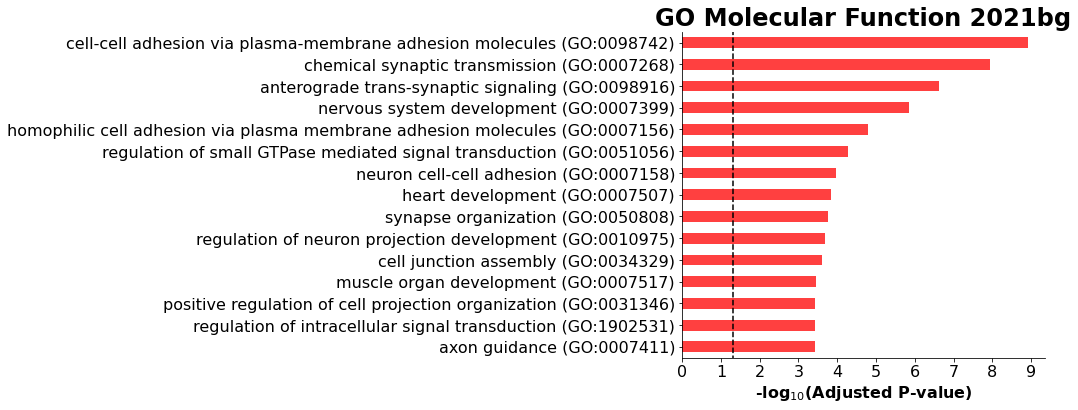

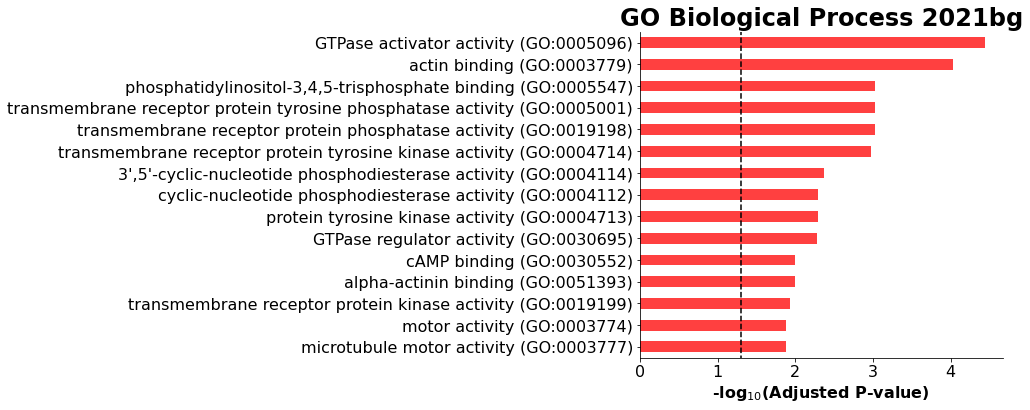

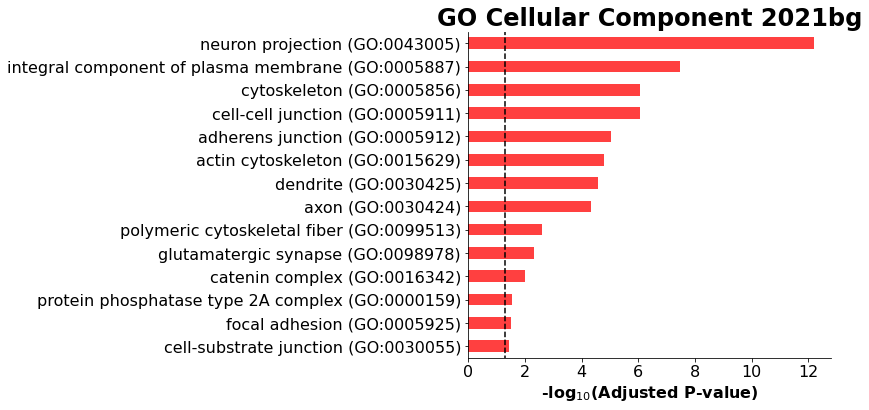

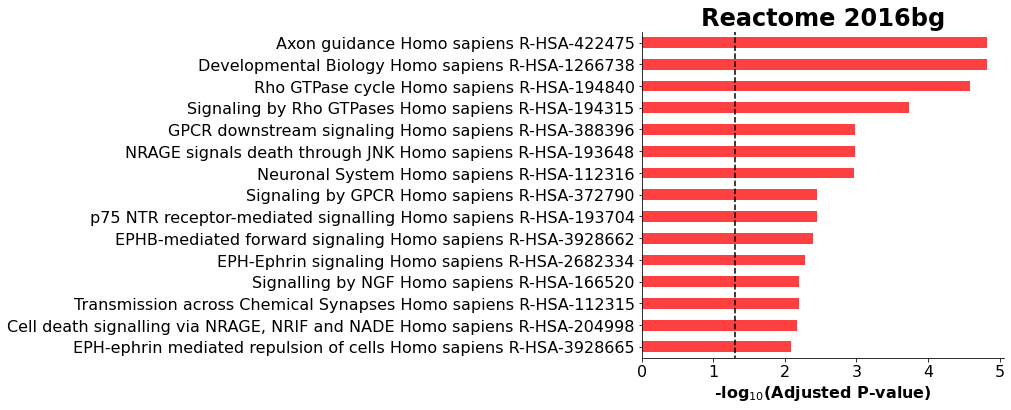

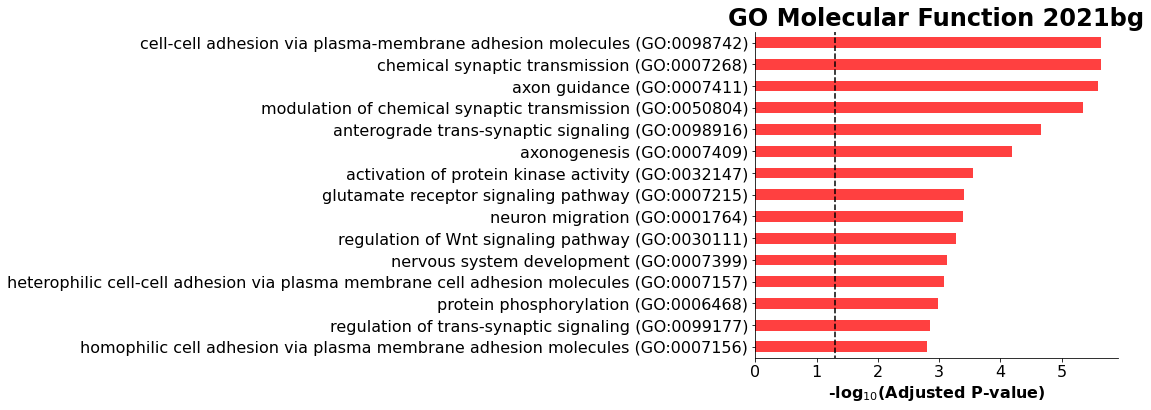

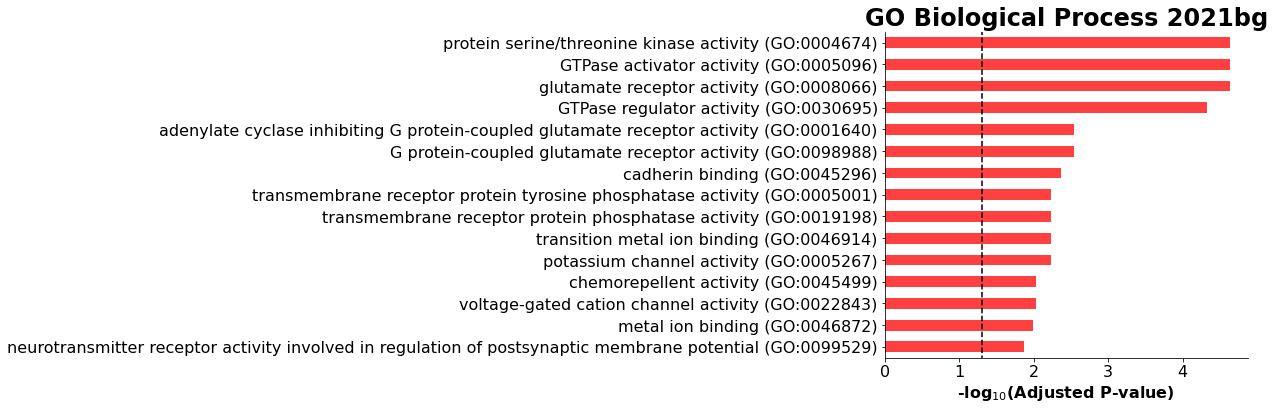

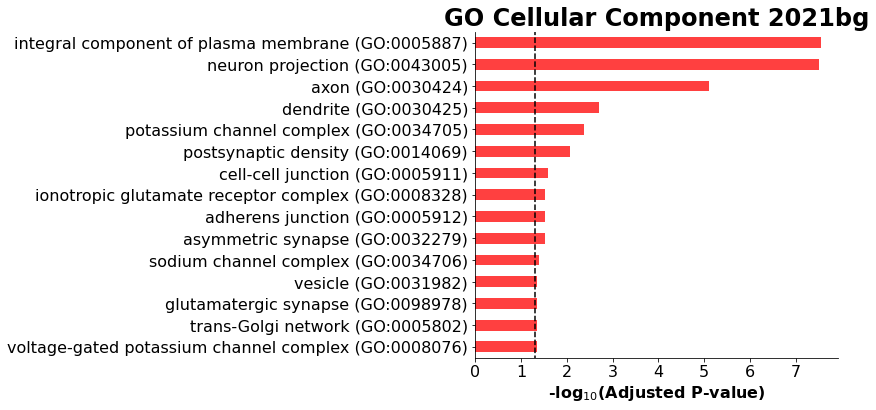

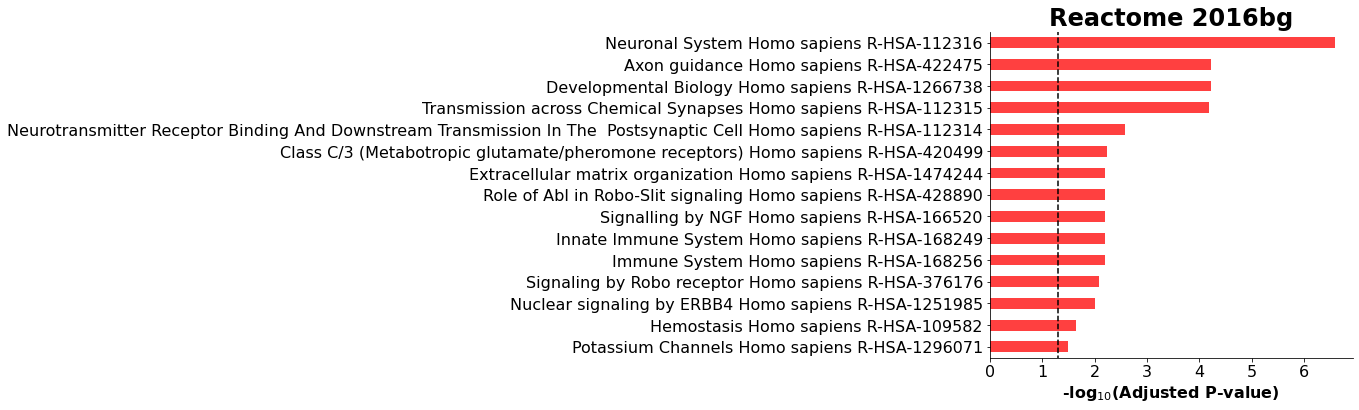

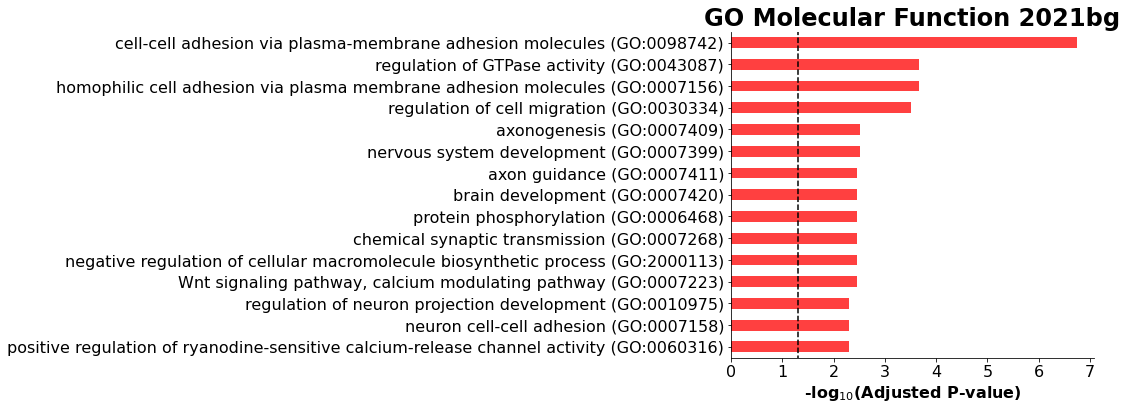

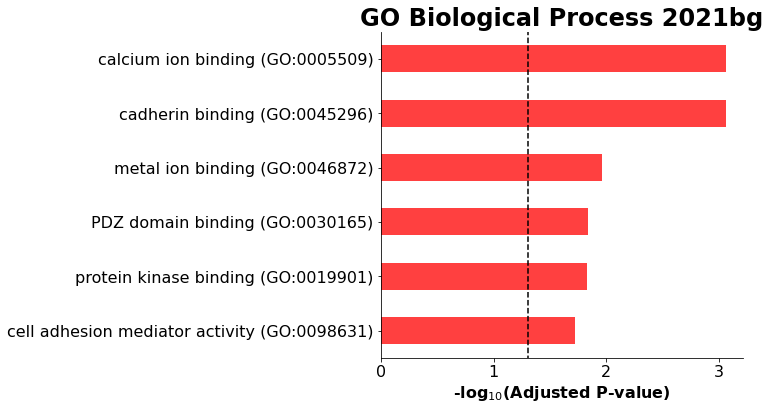

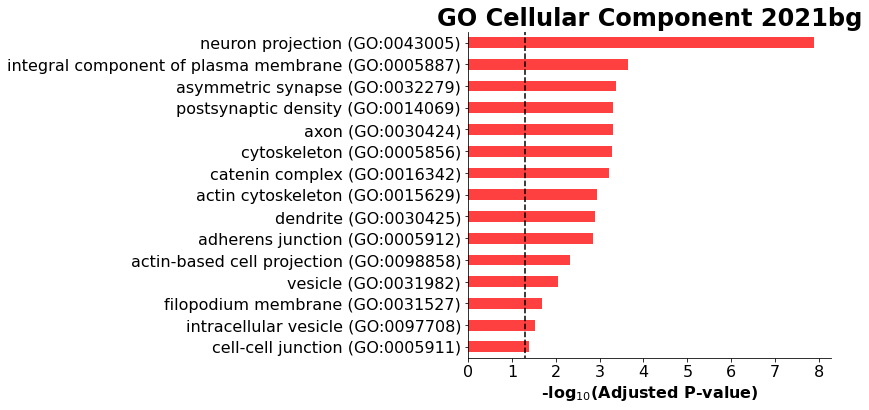

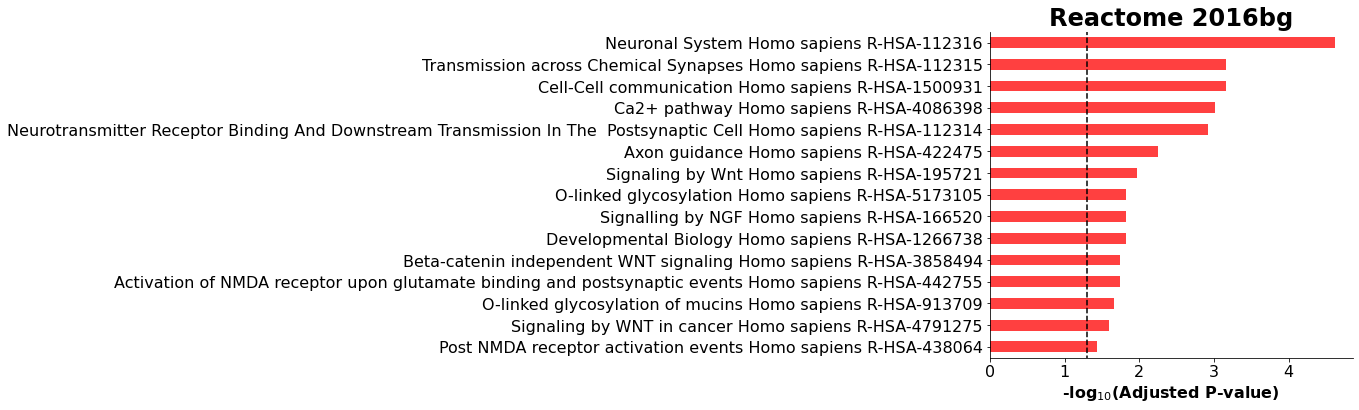

In [12]:
genelists = []
cons_in_table = ['cons','inno','non_inno']
table_names = ['two_alleles.tsv', 'fixed_inno.tsv', 'fixed_noninno.tsv']

df2 = pd.read_csv(f'{path_to_data}final_data/two_alleles.tsv', sep = '\t')

df2['start'] = df2['start']+1 
all_tabels = []
all_dfs = []
for i in range(3):
    print(cons_in_table[i])

    df2 = pd.read_csv(f'{path_to_data}final_data/{table_names[i]}', sep = '\t')
    
    print(f'number of positions:  {df2.shape[0]}')

    df2['start'] = df2['start']+1 
    
    df3 = df2[(((df2['n_inno']>=4)&(df2['n_noninno']>=4)) |
              (((df2['n_inno']==3)&(df2['n_noninno']==4))&((df2['inno_N']==1)|(df2['inno_-']==1)))|
             (((df2['n_noninno']==3)&(df2['n_inno']==4))&((df2['noninno_N']==1)|(df2['noninno_-']==1))))
              &(df2[cons_in_table[i]]==True)]

    all_dfs.append(df3)
    matched_list = []

    for chrom in df3['chrom'].unique():
        df3_chrom = df3[df3['chrom']== chrom]
        df_chrom = df[df['chrom']==chrom]

        for idx in df3_chrom.index:
            df_small = df_chrom[(df_chrom['start']<=df3_chrom.loc[idx]['start'])
                                         &(df_chrom['end']>=df3_chrom.loc[idx]['start'])]
            df_small['coord'] = int(df3_chrom.loc[idx]['start'])
            df_small['coord'] = df_small['coord']+1
            df_small['type'] = cons_in_table[i]
            matched_list.append(df_small)
    df_genes = pd.concat(matched_list)

    df_genes['element_ID'] = df_genes['attributes'].apply(lambda x: x.split(';')[0].split('=')[1].split('-')[1])
    df_genes.head()

    genelist = list(set(df_genes['element_ID'].to_list()))
    genelists.append(set(genelist))
    print(len(genelist))
    all_tabels.append(df_genes)

    l = -np.log10(0.05)



    plot(get_df(go_BP, genelist, background), 'bg', 'GO_Molecular_Function_2021')
    plot(get_df(go_MF, genelist, background), 'bg', 'GO_Biological_Process_2021')
    plot(get_df(go_CC, genelist, background), 'bg', 'GO_Cellular_Component_2021')
    plot(get_df(go_reactome, genelist, background), 'bg', 'Reactome_2016')

relult_df = pd.concat(all_tabels)
all_df = pd.concat(all_dfs)
all_df['coord']=all_df['start']+1

In [14]:
all_tabels[0]

,seq_id,source,type,start,end,score,strand,phase,attributes,chrom,element_ID,coord
451,NC_044211.2,Gnomon,cons,396488,414393,.,+,.,ID=gene-TMEM45A;Dbxref=GeneID:100221943;Name=T...,NC_044211.2,TMEM45A,407366
1447,NC_044211.2,Gnomon,cons,1811961,1925221,.,+,.,ID=gene-ALCAM;Dbxref=GeneID:100221881;Name=ALC...,NC_044211.2,ALCAM,1837255
1514,NC_044211.2,Gnomon,cons,1941545,2064996,.,-,.,ID=gene-CBLB;Dbxref=GeneID:100226776;Name=CBLB...,NC_044211.2,CBLB,1997069
2288,NC_044211.2,Gnomon,cons,2696321,2739178,.,-,.,ID=gene-MYH15;Dbxref=GeneID:100220019;Name=MYH...,NC_044211.2,MYH15,2727695
2516,NC_044211.2,Gnomon,cons,3391754,3446452,.,+,.,ID=gene-NECTIN3;Dbxref=GeneID:100218199;Name=N...,NC_044211.2,NECTIN3,3426154
...,...,...,...,...,...,...,...,...,...,...,...,...
1251352,NC_045028.1,Gnomon,cons,19994557,20166347,.,-,.,ID=gene-LOC116806978;Dbxref=GeneID:116806978;N...,NC_045028.1,LOC116806978,20149478
1254384,NC_044242.2,Gnomon,cons,703635,725114,.,+,.,ID=gene-LARP4;Dbxref=GeneID:115491385;Name=LAR...,NC_044242.2,LARP4,715130
1254704,NC_044242.2,Gnomon,cons,814550,866605,.,+,.,ID=gene-SCN8A;Dbxref=GeneID:115491370;Name=SCN...,NC_044242.2,SCN8A,830370
1254704,NC_044242.2,Gnomon,cons,814550,866605,.,+,.,ID=gene-SCN8A;Dbxref=GeneID:115491370;Name=SCN...,NC_044242.2,SCN8A,856455


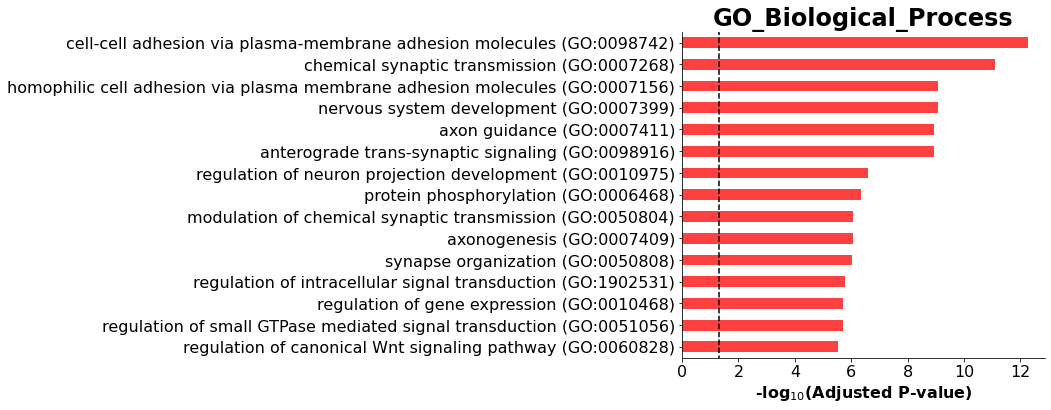

In [48]:
def plot_proc(df, name):
    barplot(df.res2d, top_term=15, cutoff=0.05,color = 'r',
           title = name,)
    plt.plot([l,l],[-1, 15], linestyle = '--',color='k',
             label = '- log10(0.05)')

plot_proc(get_df(go_BP, genelists_all, background), 'GO_Biological_Process')

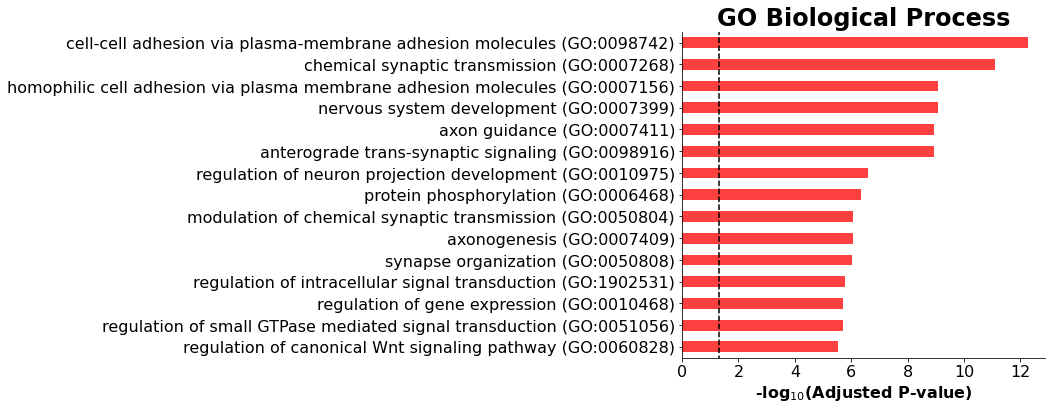

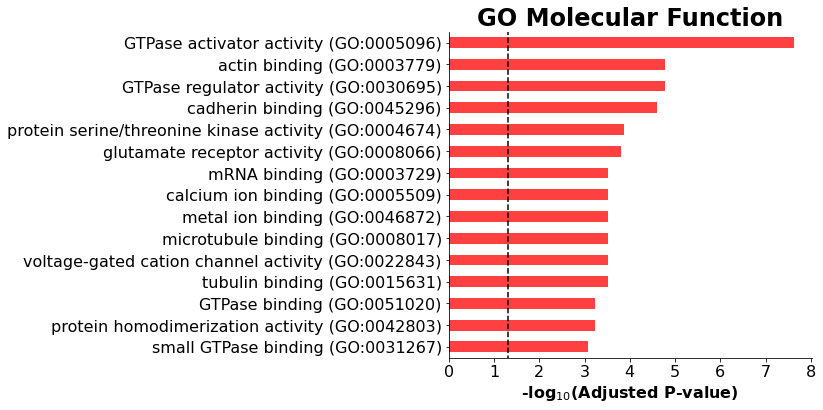

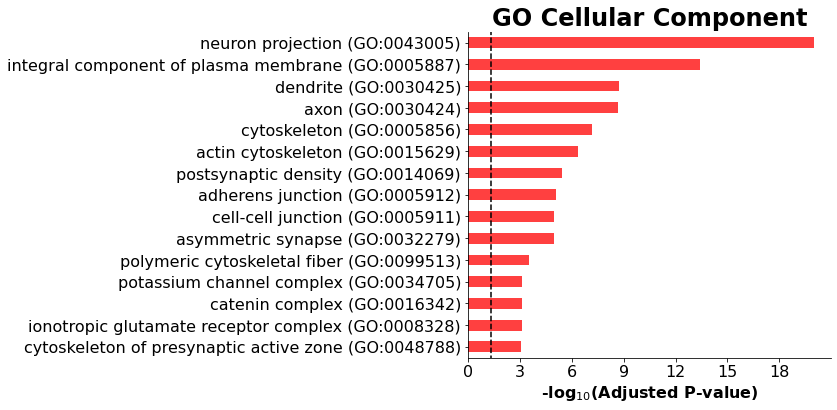

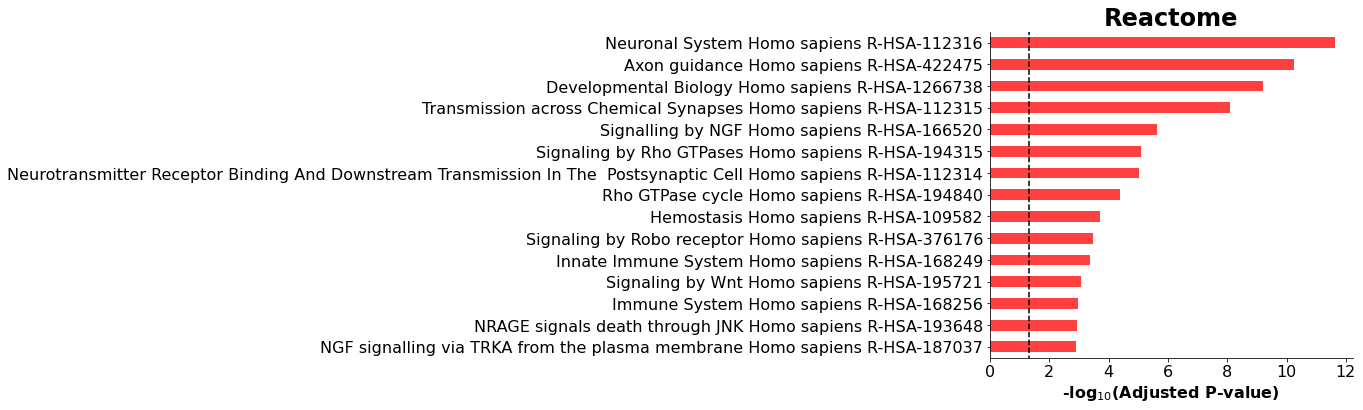

In [49]:
genelists_all = list(genelists[0]|genelists[1]|genelists[2])
plot(get_df(go_BP, genelists_all, background),'', 'GO Biological Process', save = True)
plot(get_df(go_MF, genelists_all, background), '', 'GO Molecular Function', save = True)
plot(get_df(go_CC, genelists_all, background), '', 'GO Cellular Component', save = True)
plot(get_df(go_reactome, genelists_all, background), '', 'Reactome', save = True)

In [51]:
' '.join(genelists_all)

'NFIA LOC115495954 CLASP2 CRHR2 GATB STK16 SLC2A1 DNAJC24 SLC9A3R1 DACH2 LOC121470356 TBC1D30 LOC105758485 SLC22A2 ARVCF TBK1 FRYL PNPLA4 LOC115496272 PRKCA TECPR2 LOC101233446 PSD2 RFX2 RGS10 PTPRD LOC100218614 LOC115496301 APBB2 AQR IGDCC3 C6H10orf90 ANXA13 ADSS2 GSE1 KCND2 C2H5orf22 SBF2 NSUN6 CAMK4 GGA3 ZNF516 CNTN5 SLC25A24 MRPL21 ACTC1 KCNMA1 LOC121469399 RAPGEF1 UPB1 MAK SYNPR INTS8 LOC100223016 PAPPA2 MAP4K4 HIPK2 LOC100219073 ELMO1 BCL2L1 CDH7 TET2 TAF4B TCAF2 CLCC1 TXNDC16 SCIN MCOLN2 ENGASE CEP164 MPPED2 PKN3 PSD3 DGKI RIMS1 NEDD4L LOC115494324 LOC115491013 CCBE1 CDH19 FAT4 COL14A1 PPM1L USP15 SECISBP2L MRPS15 LOC121468101 ZHX3 ITSN2 HPCAL1 TESC SCGN ZNF423 RASGRF2 ETS1 CHCHD7 MEGF11 LGSN MGAT3 ATXN7 RIF1 MTMR9 TAFA1 ARID5B LOC100222962 RUSC2 IQCK RIMS4 LMO1 SIN3A COL3A1 PCDH7 ICOSLG MYNN TOX2 ARHGAP31 SNRPC SYT13 CLNS1A LOC115495573 KCNMB4 EPHB2 LOC121468113 KLF3 BANK1 GRIN3A DESI1 MAU2 LOC115497553 HMGA2 FOXRED2 TXNDC12 ADA RNF150 GRM5 TTC13 BOD1L1 LOC115496997 TNIK SYN3 S